# SOLUTION - Polynomial Regression: The Bias-Variance Tradeoff

## Main objective
> __Fit a polynomial regression model to the given data. Consider the order of the polynomial as a hyperparameter and find its best value by applying *grid search*.__  

The data file is named `example_data.csv` and it is found in the `../data/` folder. The response variable is denoted as `y` and the explanatory variable as `x`, respectively.

### Suggested workflow

* Load the relevant Python modules and libraries.
* Load the data set and inspect the data by plotting it.
* Split the data into a training and a test set.
* Define a reasonable model metric (e.g. root mean square error).
* Model building: Build 6 different polynomial regression models, with degrees of $k = 1,2,3,5,9,14$. 
* For each model calculate the model metric on the training set and on the validation.
* Plot the data together with the regression line, given by each particular model. 
* Finally report the best `k` with respect to the model metric evaluated on the test set.
***

#### Import libraries

In [1]:
%matplotlib inline
# your code here

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#### Load the data set

In [3]:
# your code here
data = pd.read_csv("../data/example_data.csv", index_col=0)
data.sample(6)

,x,y
51,0.200038,1.295826
23,0.430622,0.357974
50,0.207393,0.509127
57,0.948595,-0.615637
3,0.290394,1.033831
2,0.859299,-0.331955


#### Plot the data set

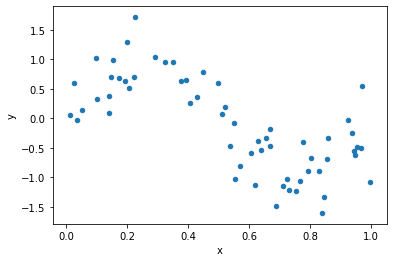

In [4]:
# your code here
data.plot.scatter(x="x", y="y");

####  Train-Validation Split

In [5]:
# your code here
X = data.x.values.reshape(-1, 1)
y = data.y.values.reshape(-1, 1)
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X, y, 
                                                    test_size=0.33,
                                                    random_state=42)

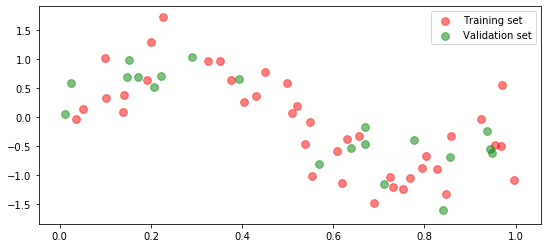

In [6]:
fig, ax = plt.subplots(figsize=(9,4))
ax.scatter(x=X_train, y=y_train,
           alpha=0.5, s=60, color="r", label="Training set")
ax.scatter(x=X_val, y=y_val,
           alpha=0.5, s=60, color="g", label="Validation set")
ax.legend();

#### Model building

The Learning Algorithm

[Polynomial regression](https://en.wikipedia.org/wiki/Polynomial_regression) is a special type of linear regression in which the relationship between the predictor variable $x$ and the response variable $y$ is modeled by a k<sup>th</sup>-degree polynomial in $x$. The incorporation of k<sup>th</sup>-degree polynomials results in a nonlinear relation between $y$ and $x$, but between the parameters $(\beta_i)$ and the expected observations is linear. The model equation can be written as 

$$\hat y = \beta_0+\beta_1x+\beta_2x^2+...+\beta_kx^k+\epsilon$$

Finding the optimal parameter combination is done by minimizing the **sum of squared errors (SSE)**, given by the equation

$$SSE = \sum e^2 = \sum (\hat y - y)^2 $$

By fitting a polynomial to observations there arises the problem of choosing the order $k$ of the polynomial. How to choose the right number for the polynomial is a matter of an important concept called **model comparison** or [**model selection**](https://en.wikipedia.org/wiki/Model_selection). To keep it simple we use the [**root-mean-square error  (RMSE)**](https://en.wikipedia.org/wiki/Root-mean-square_deviation) defined by

$$RMSE = \sqrt{\frac{\sum_{i=1}^n (\hat y - y)^2}{n}}$$

to evaluate the goodness-of-fit of the model. 

The `scikit-learn` library provides many model metrics.


#### Model metric (e.g. root mean square error)

In [7]:
# your code here
def rmse(y_true, y_pred):
    from sklearn.metrics import mean_absolute_error
    rmse = np.sqrt(mean_absolute_error(y_true, y_pred))
    return rmse

#### Hyperparamter: Generate polynomial and interaction features (Feature engineering).


$$\text{e.g. 2nd order:} \qquad (x,y) \to (x,y,x^2, xy,y^2)$$ 



Generate a new feature matrix consisting of all polynomial combinations of the features with degree less than or equal to the specified degree.

The `scikit-learn` library provides powerful functionality to create polynomial features.

#### Build 6 different polynomial regression models, with degrees of $k = 1,2,3,5,9,14$.

_Hint: Start building one model and then expand your approach_

#### Build model with $k=1$

In [8]:
# your code here
from sklearn import linear_model
model = linear_model.LinearRegression()
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

#### Calculate the model metric on the training set and on the validation set.

In [9]:
# your code here
pred_y_train = model.predict(y_train)
pred_y_val = model.predict(y_val)
print("RMSE on training data: ", rmse(y_train, pred_y_train))
print("RMSE on validation data: ", rmse(y_val, pred_y_val))

RMSE on training data:  1.4594836435640173
RMSE on validation data:  1.4237270657725862


#### Build model with $k=2$ and evaluate predictions

In [10]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=2)
X_train2 = poly.fit_transform(X_train)
X_val2 = poly.fit_transform(X_val)

#y_train2 = poly.fit_transform(y_train)
#y_val2 = poly.fit_transform(y_val)
model = linear_model.LinearRegression()
model.fit(X_train2, y_train)

pred_y_train2 = model.predict(X_train2)
pred_y_val2 = model.predict(X_val2)
print("RMSE on training data: ", rmse(y_train, pred_y_train2))
print("RMSE on validation data: ", rmse(y_val, pred_y_val2))

RMSE on training data:  0.7143549630073512
RMSE on validation data:  0.5987326732965843


#### Plot the data together with the regression line, given by each particular model. 

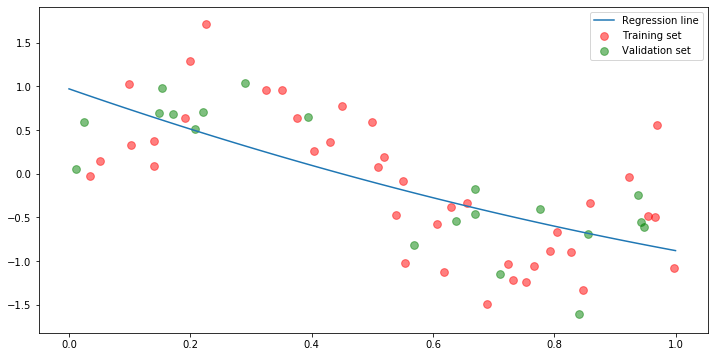

In [11]:
# your code here
X_predict_reg_line = poly.transform(np.linspace(0,1, 100).reshape(-1,1))
y_reg_line = model.predict(X_predict_reg_line)

fig, ax = plt.subplots(figsize=(12,6))
ax.plot(np.linspace(0,1, 100), y_reg_line, label="Regression line")
ax.scatter(x=X_train, y=y_train,
           alpha=0.5, s=60, color="r", label="Training set")
ax.scatter(x=X_val, y=y_val,
           alpha=0.5, s=60, color="g", label="Validation set")
ax.legend();

> For the purpose of reproducibility we write a function to build polynomial regression models of any order and evaluates them on a series of data points

In [12]:
def build_polynomial_model(X_train, y_train, X_val, y_val, degree, X_predict=np.linspace(0,1, 100)):
    from sklearn.preprocessing import PolynomialFeatures
    from sklearn import linear_model
    
    ### create polynomial features ###
    poly = PolynomialFeatures(degree)
    poly.fit(X_train)
    # polynomials for the train set
    X_train_poly = poly.transform(X_train)
    # polynomials for the validation set
    X_val_poly = poly.transform(X_val)
    # polynomials for the regression line
    X_predict_reg_line = poly.transform(X_predict.reshape(-1,1))
        
    ### create the model ###
    model = linear_model.LinearRegression()
    
    ### fit the model ###
    model.fit(X_train_poly, y_train)
    


    ### predict on training set ###
    y_train_predict = model.predict(X_train_poly)
    ## RMSE on training set
    rmse_train = rmse(y_train_predict, y_train)

    ### predict validation set ###
    y_val_predict = model.predict(X_val_poly)
    ## RMSE on validation set
    rmse_val = rmse(y_val_predict, y_val)
    
    ### create regression line ###
    y_predict_reg_line = model.predict(X_predict_reg_line)

    return rmse_train, rmse_val, y_predict_reg_line


In [13]:
(rmse_train, 
 rmse_val, 
 y_predict_reg_line) = build_polynomial_model(X_train,
                                              y_train, 
                                              X_val,
                                              y_val,
                                              degree=5)


In [14]:
def visualize_polynomial_model(X_train,
                               y_train,
                               X_val,
                               y_val,
                               X_predict=np.linspace(0,1, 100),
                               degree=5, ax=None):
    (rmse_train, 
     rmse_val, 
     y_predict_reg_line) = build_polynomial_model(X_train,
                                              y_train, 
                                              X_val,
                                              y_val,
                                              degree=degree, 
                                              X_predict=X_predict)
    
    if ax is None:
        fig, ax = plt.subplots(figsize=(12,6))
        
    ax.scatter(x=X_train, y=y_train,
           alpha=0.5, s=60, color="r", label="Training set")
    ax.scatter(x=X_val, y=y_val,
           alpha=0.5, s=60, color="g", label="Validation set")
    ax.legend(loc="lower left")
    ax.plot(X_predict, y_predict_reg_line)
    ax.text(s=r"$RMSE_T:$ {}".format(np.round(rmse_train,3)), 
            x=0.75, y=1.15, size=16)
    ax.text(s=r"$RMSE_V:$ {}".format(np.round(rmse_val,3)), 
            x=0.75,y=0.85, size=16)
    ax.set_ylim(-1.95,1.95)
    ax.set_title("Polynomial Regression (degree: {})".format(degree), 
                 size=18);    


__Visualize the results for different__  $k$

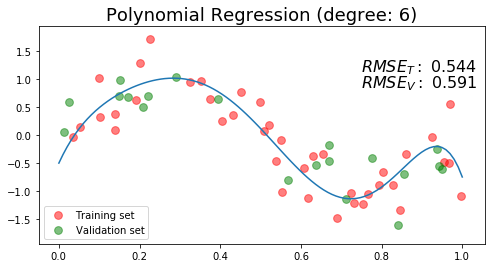

In [15]:
fix, ax = plt.subplots(figsize=(8,4))
visualize_polynomial_model(X_train=X_train, y_train=y_train,
                           X_val=X_val, y_val=y_val,
                           degree=6, ax=ax)

#### Report the best `k` with respect to the model metric evaluated on the validation set.

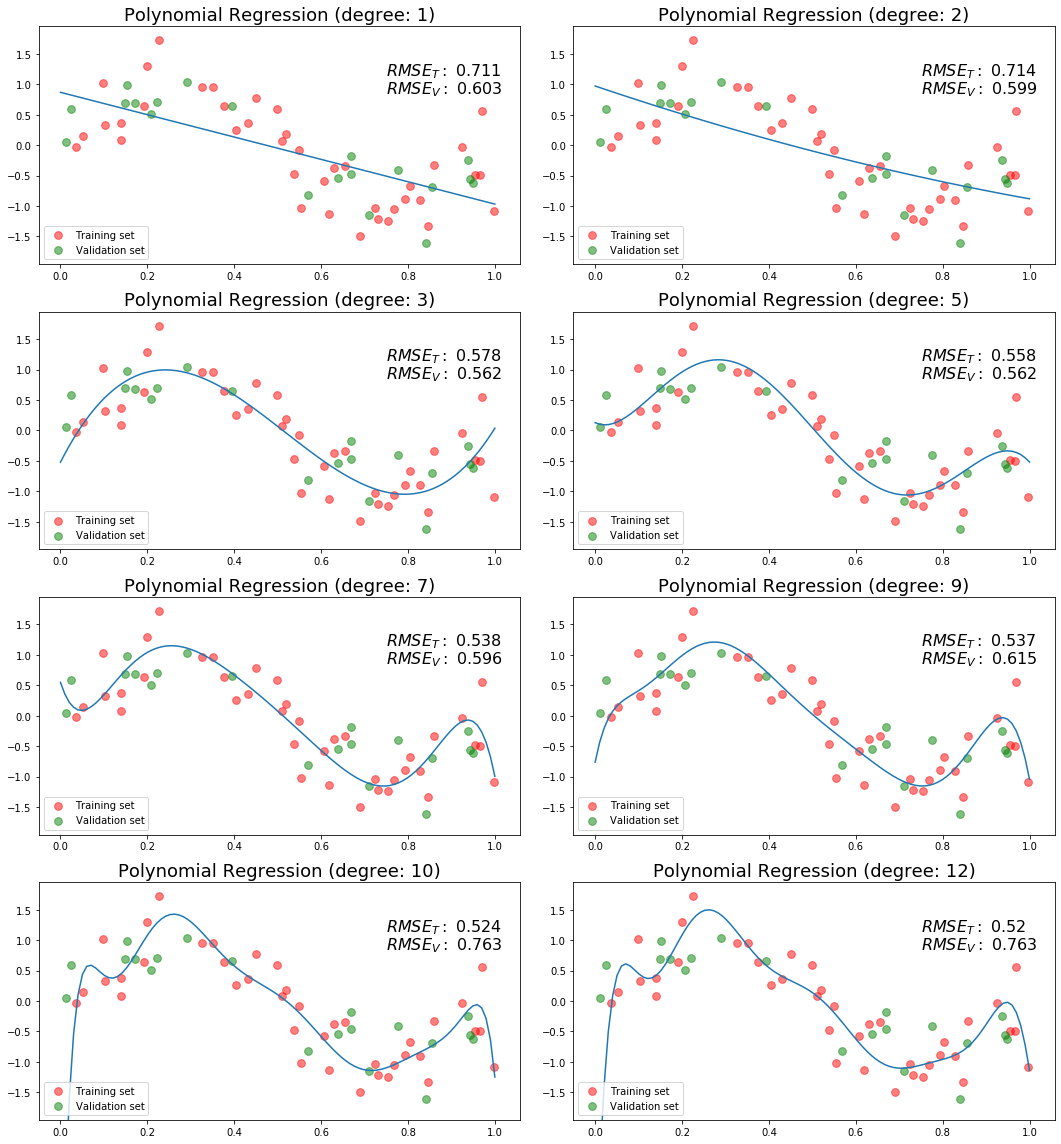

In [16]:
fix, axes = plt.subplots(4,2,figsize=(15,16))
axes = axes.ravel()
rmse_train_metric = []
rmse_val_metric = []
degrees = [1,2,3,5,7,9,10,12]
for e, degree in enumerate(degrees):
    
    (rmse_train, 
     rmse_val, 
     _) = build_polynomial_model(X_train,
                                 y_train,
                                 X_val,
                                 y_val,
                                 degree=degree)
    
    
    visualize_polynomial_model(X_train=X_train, y_train=y_train,
                           X_val=X_val, y_val=y_val,
                           degree=degree, ax=axes[e])
    
    rmse_train_metric.append(rmse_train)
    rmse_val_metric.append(rmse_val)
    
plt.tight_layout()

Awesome, pretty plots! The figure shows, that if we increase $k$, the order of the polynomial, the curve becomes more flexible and it fits the data better and better. The better the data is fitted the lower becomes the error, RMSE. 

What is the best polynomial to fit the data?   

Recall the goal is to learn the parameters from the data, thus we are interested in achieving a good generalization of the model and not necessarily perfectly fitted observation data. Such a behavior is known as [**overfitting**](https://en.wikipedia.org/wiki/Overfitting).


For convenience we plot the RMSE against $k$. 

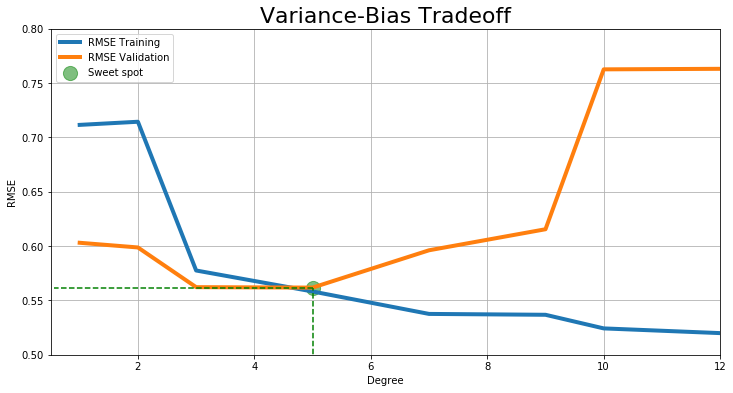

In [17]:
# build data frame
res = pd.DataFrame({"RMSE Training":rmse_train_metric,
                    "RMSE Validation":rmse_val_metric},
                    index=degrees)
# compute sweet spot
sweet_spot_y = res["RMSE Validation"].min()
sweet_spot_x = res["RMSE Validation"].idxmin()

# plot
fig, ax = plt.subplots(figsize=(12,6))
res.plot(ax=ax, linewidth=4)
ax.scatter(x=sweet_spot_x, y=sweet_spot_y, s=200, 
           alpha=0.5, label="Sweet spot", color="g")
ax.plot((sweet_spot_x, sweet_spot_x),(0,sweet_spot_y),
        linestyle="dashed", color="g")
ax.plot((sweet_spot_x, sweet_spot_y),(sweet_spot_y, sweet_spot_y),
        linestyle="dashed", color="g")

ax.set_ylim(0.5,0.8)
ax.set_xlim(0.5,12)
ax.set_xlabel("Degree")
ax.set_ylabel("RMSE")
ax.grid()
ax.legend()
ax.set_title("Variance-Bias Tradeoff", size=22);

The figure shows that the error on the training data (blue line) is constantly decreasing. If we take a look at the RMSE for the validation set (orange line), we see that with increasing $k$, and thus increasing model complexity, the error decreases.

Note that there is a sweet spot, indicated by the lowest RMSE on the validation set, where the model is just complex enough to generalize well on the so far unseen validation data. In our example the sweet spot is obtained for a regression model of 5<sup>th</sup> order. 